# find best n_neighbors

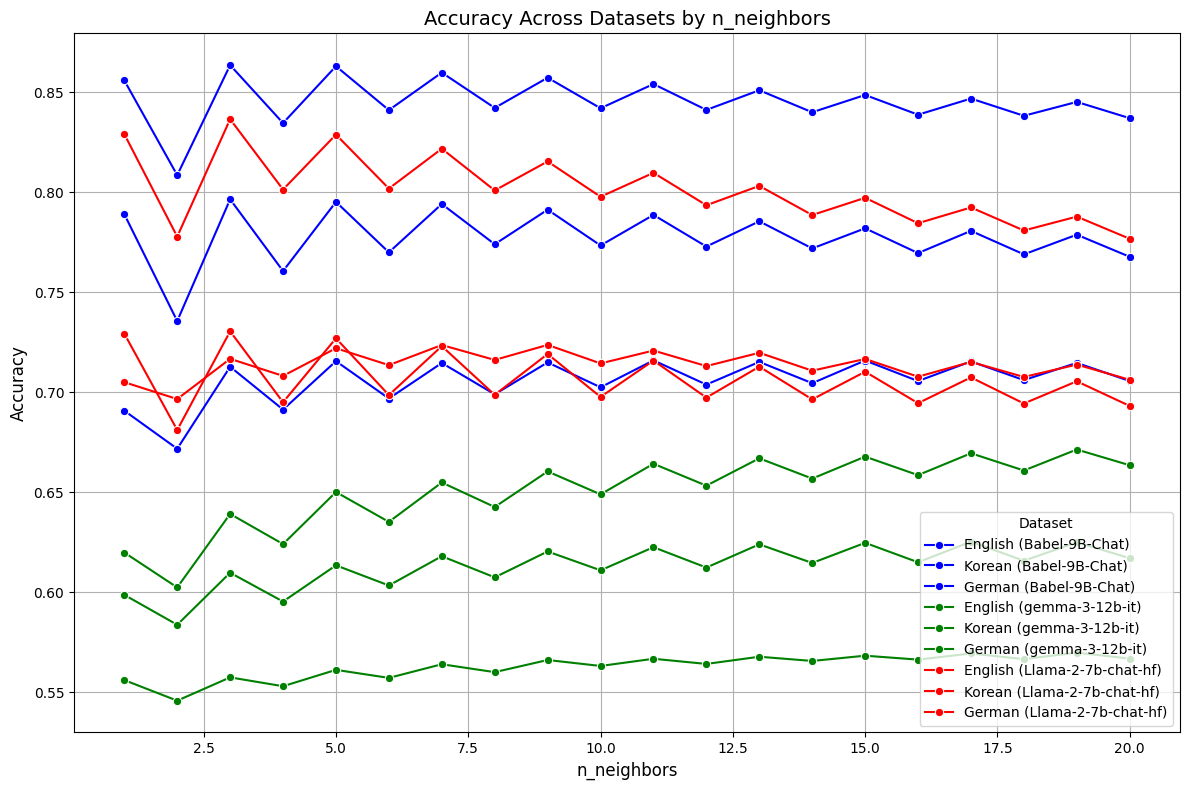

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_accuracy_across_datasets(dataset_paths, language_colors):
    """
    Plots accuracy for each dataset as a line, grouped by language with the same color.

    Args:
    - dataset_paths (list): List of file paths to the datasets.
    - language_colors (dict): Dictionary mapping languages to colors.
    """
    plt.figure(figsize=(12, 8))

    for dataset_path in dataset_paths:
        # Extract language and tokenizer from the filename
        filename = os.path.basename(dataset_path)
        language = filename.split("_")[4].split("-")[0]  # Extract language (e.g., "English", "Korean", "German")
        # language = filename.
        tokenizer = filename.split("_")[3]  # Extract tokenizer (e.g., "Babel-9B-Chat")

        # Load the dataset
        df = pd.read_csv(os.path.join("/home/hyujang/multilingual-inner-lexicon", dataset_path))

        # Group by n_neighbors and calculate the mean accuracy
        mean_accuracy = df.groupby("n_neighbors")["Accuracy"].mean().reset_index()

        # Plot the line for this dataset
        sns.lineplot(
            data=mean_accuracy,
            x="n_neighbors",
            y="Accuracy",
            label=f"{language} ({tokenizer})",
            color=language_colors.get(tokenizer, "black"),  # Use the color for the language
            marker="o"
        )

    # Add labels, title, and legend
    plt.xlabel("n_neighbors", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Accuracy Across Datasets by n_neighbors", fontsize=14)
    plt.legend(title="Dataset", fontsize=10, loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
dataset_paths = [
    "output/knn_eval_results_Babel-9B-Chat_English-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_Korean-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_German-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_English-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_Korean-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_German-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_English-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_Korean-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_German-wiki.csv"
]

# Define colors for each language
language_colors = {
    "Babel-9B-Chat": "blue",
    "gemma-3-12b-it": "green",
    "Llama-2-7b-chat-hf": "red"
}

plot_accuracy_across_datasets(dataset_paths, language_colors)

In [15]:
import pandas as pd
import os

def find_best_n_neighbors(dataset_paths):
    """
    Finds the best n_neighbors value across multiple datasets based on average accuracy.

    Args:
    - dataset_paths (list): List of file paths to the datasets.

    Returns:
    - int: The best n_neighbors value.
    """
    all_results = []

    for dataset_path in dataset_paths:
        # Load the dataset
        df = pd.read_csv(os.path.join("/home/hyujang/multilingual-inner-lexicon", dataset_path))
        
        # Group by n_neighbors and calculate the mean accuracy
        mean_accuracy = df.groupby("n_neighbors")["Accuracy"].mean().reset_index()
        mean_accuracy["dataset"] = os.path.basename(dataset_path)  # Add dataset name for reference
        all_results.append(mean_accuracy)

    # Combine results from all datasets
    combined_results = pd.concat(all_results, ignore_index=True)

    # Calculate the overall average accuracy for each n_neighbors value
    overall_mean_accuracy = combined_results.groupby("n_neighbors")["Accuracy"].mean()

    # Find the n_neighbors value with the highest average accuracy
    best_n_neighbors = overall_mean_accuracy.idxmax()
    best_accuracy = overall_mean_accuracy.max()

    print(f"Best n_neighbors: {best_n_neighbors} with average accuracy: {best_accuracy:.4f}")
    return best_n_neighbors

# Example usage
dataset_paths = [
    "output/knn_eval_results_Babel-9B-Chat_English-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_Korean-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_German-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_English-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_Korean-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_German-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_English-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_Korean-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_German-wiki.csv"
]

best_n_neighbors = find_best_n_neighbors(dataset_paths)

Best n_neighbors: 5 with average accuracy: 0.7197


# plot knn results

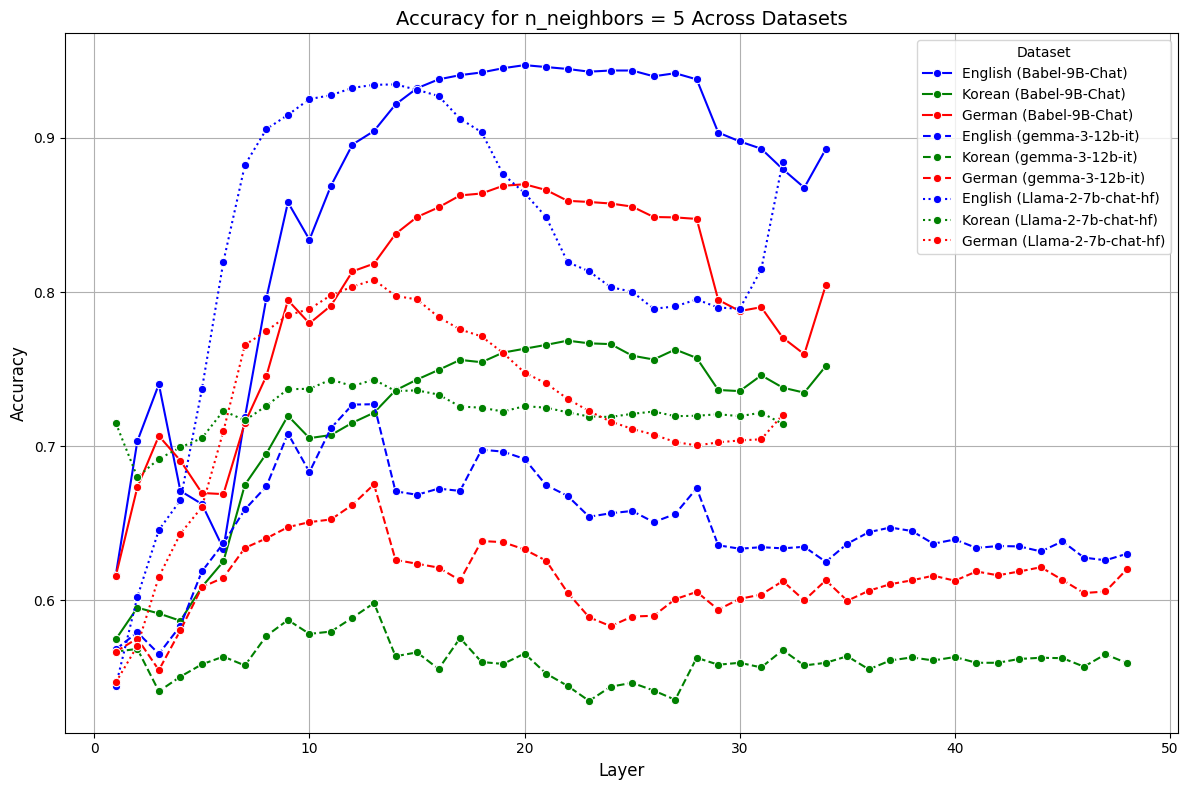

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_n_neighbors_5_accuracy(dataset_paths, language_colors, model_styles):
    """
    Plots accuracy for n_neighbors = 5 for each dataset, grouped by language (color) and model (line style).

    Args:
    - dataset_paths (list): List of file paths to the datasets.
    - language_colors (dict): Dictionary mapping languages to colors.
    - model_styles (dict): Dictionary mapping models to line styles.
    """
    plt.figure(figsize=(12, 8))

    for dataset_path in dataset_paths:
        # Extract language and tokenizer from the filename
        filename = os.path.basename(dataset_path)
        language = filename.split("_")[4].split("-")[0]  # Extract language (e.g., "English", "Korean", "German")
        # language = filename.
        model = filename.split("_")[3]  # Extract tokenizer (e.g., "Babel-9B-Chat")


        # Load the dataset
        df = pd.read_csv(os.path.join("/home/hyujang/multilingual-inner-lexicon", dataset_path))

        # Filter for n_neighbors = 5
        filtered_df = df[df["n_neighbors"] == 5]

        # Plot the line for this dataset
        sns.lineplot(
            data=filtered_df,
            x="Layer",
            y="Accuracy",
            label=f"{language} ({model})",
            color=language_colors.get(language, "black"),  # Use the color for the language
            linestyle=model_styles.get(model, "-"),  # Use the line style for the model
            marker="o"
        )

    # Add labels, title, and legend
    plt.xlabel("Layer", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Accuracy for n_neighbors = 5 Across Datasets", fontsize=14)
    plt.legend(title="Dataset", fontsize=10, loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
dataset_paths = [
    "output/knn_eval_results_Babel-9B-Chat_English-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_Korean-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_German-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_English-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_Korean-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_German-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_English-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_Korean-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_German-wiki.csv"
]

# Define colors for each language
language_colors = {
    "English": "blue",
    "Korean": "green",
    "German": "red"
}

# Define line styles for each model
model_styles = {
    "Babel-9B-Chat": "-",
    "gemma-3-12b-it": "--",
    "Llama-2-7b-chat-hf": ":"
}

plot_n_neighbors_5_accuracy(dataset_paths, language_colors, model_styles)

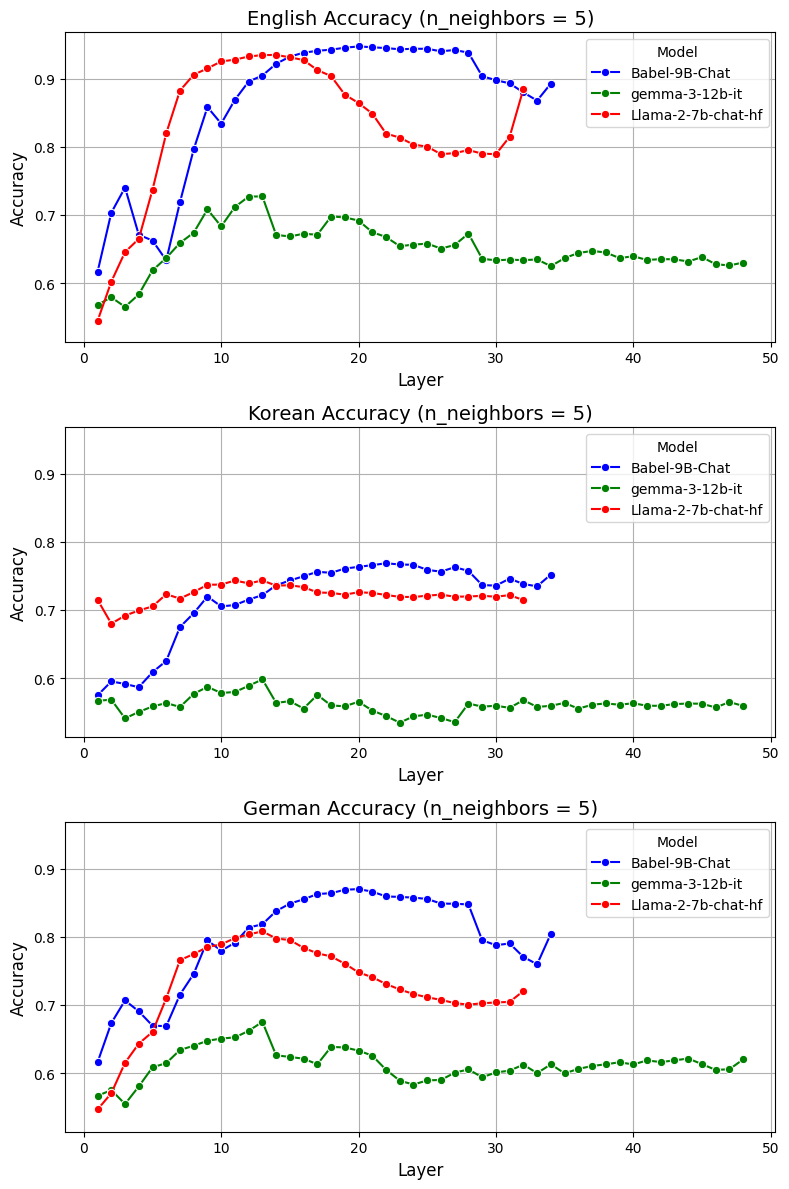

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_n_neighbors_5_accuracy_by_language(dataset_paths, language_colors, model_styles):
    """
    Creates separate subplots for each language, showing accuracy for n_neighbors = 5 for all models.

    Args:
    - dataset_paths (list): List of file paths to the datasets.
    - language_colors (dict): Dictionary mapping languages to colors.
    - model_styles (dict): Dictionary mapping models to line styles.
    """
    # Group datasets by language
    language_datasets = {"English": [], "Korean": [], "German": []}
    for dataset_path in dataset_paths:
        filename = os.path.basename(dataset_path)
        language = filename.split("_")[4].split("-")[0]  # Extract language
        language_datasets[language].append(dataset_path)

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharey=True)
    for ax, (language, paths) in zip(axes, language_datasets.items()):
        max_y = 0
        for dataset_path in paths:
            # Extract model from the filename
            filename = os.path.basename(dataset_path)
            model = filename.split("_")[3]  # Extract tokenizer (e.g., "Babel-9B-Chat")


            # Load the dataset
            df = pd.read_csv(os.path.join("/home/hyujang/multilingual-inner-lexicon", dataset_path))

            # Filter for n_neighbors = 5
            filtered_df = df[df["n_neighbors"] == 5]

            # Plot the line for this dataset
            sns.lineplot(
                data=filtered_df,
                x="Layer",
                y="Accuracy",
                label=model,
                color=model_colors.get(model, "black"),
                # color=language_colors.get(language, "black"),  # Use the color for the language
                # linestyle=model_styles.get(model, "-"),  # Use the line style for the model
                marker="o",
                ax=ax
            )
            
            max_y = max(max_y, filtered_df["Accuracy"].max())

        # Customize each subplot
        ax.set_title(f"{language} Accuracy (n_neighbors = 5)", fontsize=14)
        ax.set_xlabel("Layer", fontsize=12)
        ax.set_ylabel("Accuracy", fontsize=12)
        ax.legend(title="Model", fontsize=10, loc="best")
        ax.grid(True)
        # ax.set_ylim(0, max_y + 0.05)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
dataset_paths = [
    "output/knn_eval_results_Babel-9B-Chat_English-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_Korean-wiki.csv",
    "output/knn_eval_results_Babel-9B-Chat_German-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_English-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_Korean-wiki.csv",
    "output/knn_eval_results_gemma-3-12b-it_German-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_English-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_Korean-wiki.csv",
    "output/knn_eval_results_Llama-2-7b-chat-hf_German-wiki.csv"
]

# Define colors for each language
language_colors = {
    "English": "blue",
    "Korean": "green",
    "German": "red"
}

# Define line styles for each model
model_styles = {
    "Babel-9B-Chat": "-",
    "gemma-3-12b-it": "-",
    "Llama-2-7b-chat-hf": "-"
}

model_colors = {
    "Babel-9B-Chat": "blue",
    "gemma-3-12b-it": "green",
    "Llama-2-7b-chat-hf": "red"
}

plot_n_neighbors_5_accuracy_by_language(dataset_paths, language_colors, model_styles)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_neighbors_accuracy(dataset_path, language, top_n=3):
    """
    Plots the KNN accuracy by layer for the top N n_neighbors values.

    Args:
    - dataset_path (str): Path to the dataset CSV file.
    - language (str): Language name for the plot title.
    - top_n (int): Number of top n_neighbors values to include in the plot (default: 3).
    """
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Calculate the mean accuracy for each n_neighbors
    top_neighbors = (
        df.groupby("n_neighbors")["Accuracy"]
        .mean()
        .sort_values(ascending=False)
        .head(top_n)  # Select the top N n_neighbors
        .index
    )

    # Filter the dataset to include only the top N n_neighbors
    filtered_df = df[df["n_neighbors"].isin(top_neighbors)]

    # Create the line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_df, x="Layer", y="Accuracy", hue="n_neighbors", marker="o", palette="tab10")

    # Add labels and title
    plt.xlabel("Layer", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(f"{language} - KNN Accuracy by Layer and Top {top_n} Neighbors", fontsize=14)
    plt.legend(title="n_neighbors", fontsize=10)
    plt.grid(True)

    # Show the plot
    plt.show()

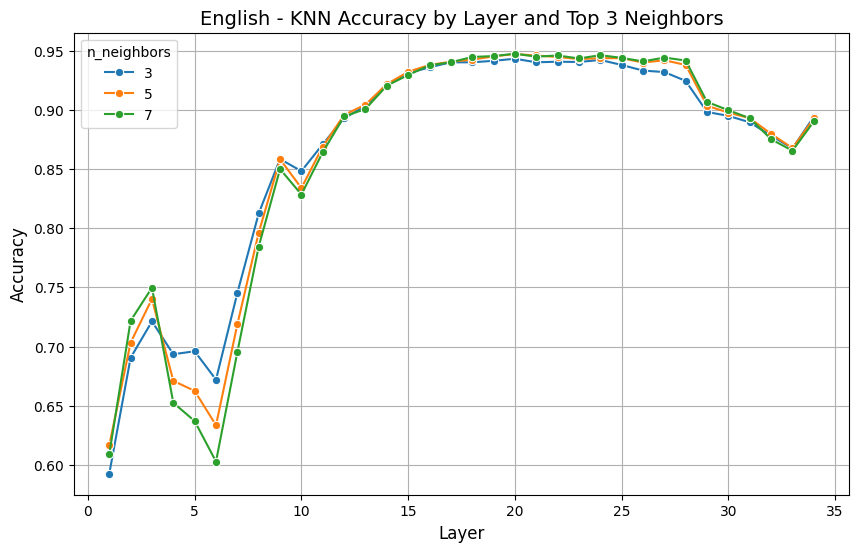

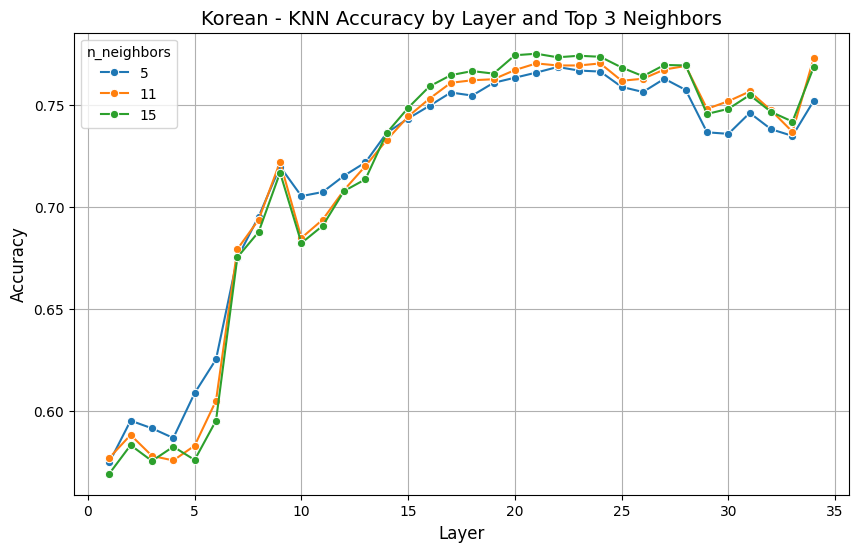

In [3]:
# Plot for English
# plot_top_neighbors_accuracy("../output/knn_eval_results_Babel-9B-Chat_English-wordnet.csv", "English")
plot_top_neighbors_accuracy("../output/knn_eval_results_Babel-9B-Chat_English-wiki.csv", "English")

# Plot for German
# plot_top_neighbors_accuracy("../output/knn_eval_results_Babel-9B-Chat_German-wiki.csv", "German")

# Plot for Korean
plot_top_neighbors_accuracy("../output/knn_eval_results_Babel-9B-Chat_Korean-wiki.csv", "Korean")